# PanelJam Friendship Graphs

***PanelJam.com*** is a small online community of artists, on which cartoons are published. In particular each cartoon (also called jam) is made up by different panels drawn by distinct users: so it is the result of some artists collaboration.

**This script analyzes and shows PanelJam friendship graphs.**


The used libraries are:
- ***pyplot***: pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation
- ***networkx***:  is a Python library for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
- ***pickle***: is a library which implements binary protocols for serializing and de-serializing a Python object structure.

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

First we de-serialize the file ***friendshipGraph.pckl*** to load the graph.

The nodes represent the users, while an edges represent the friendship relation between two users. Just looking at the number of nodes and edges of the graph we can understand that a lot of users have no friends.

In [3]:
file = open('friendshipGraph.pckl', 'rb')
friendshipGraph = pickle.load(file)
file.close()

print('Number of nodes: ', friendshipGraph.number_of_nodes())
print('Number of edges: ', friendshipGraph.number_of_edges())
print('Edges for user in average: ', round(friendshipGraph.number_of_edges()/friendshipGraph.number_of_nodes(), 3))

Number of nodes:  3038
Number of edges:  616
Edges for user in average:  0.203


The friendship graph (**undirected** and **unweighted**) shows a kind of circumference that represents the users with no friends and a connected component at the center.

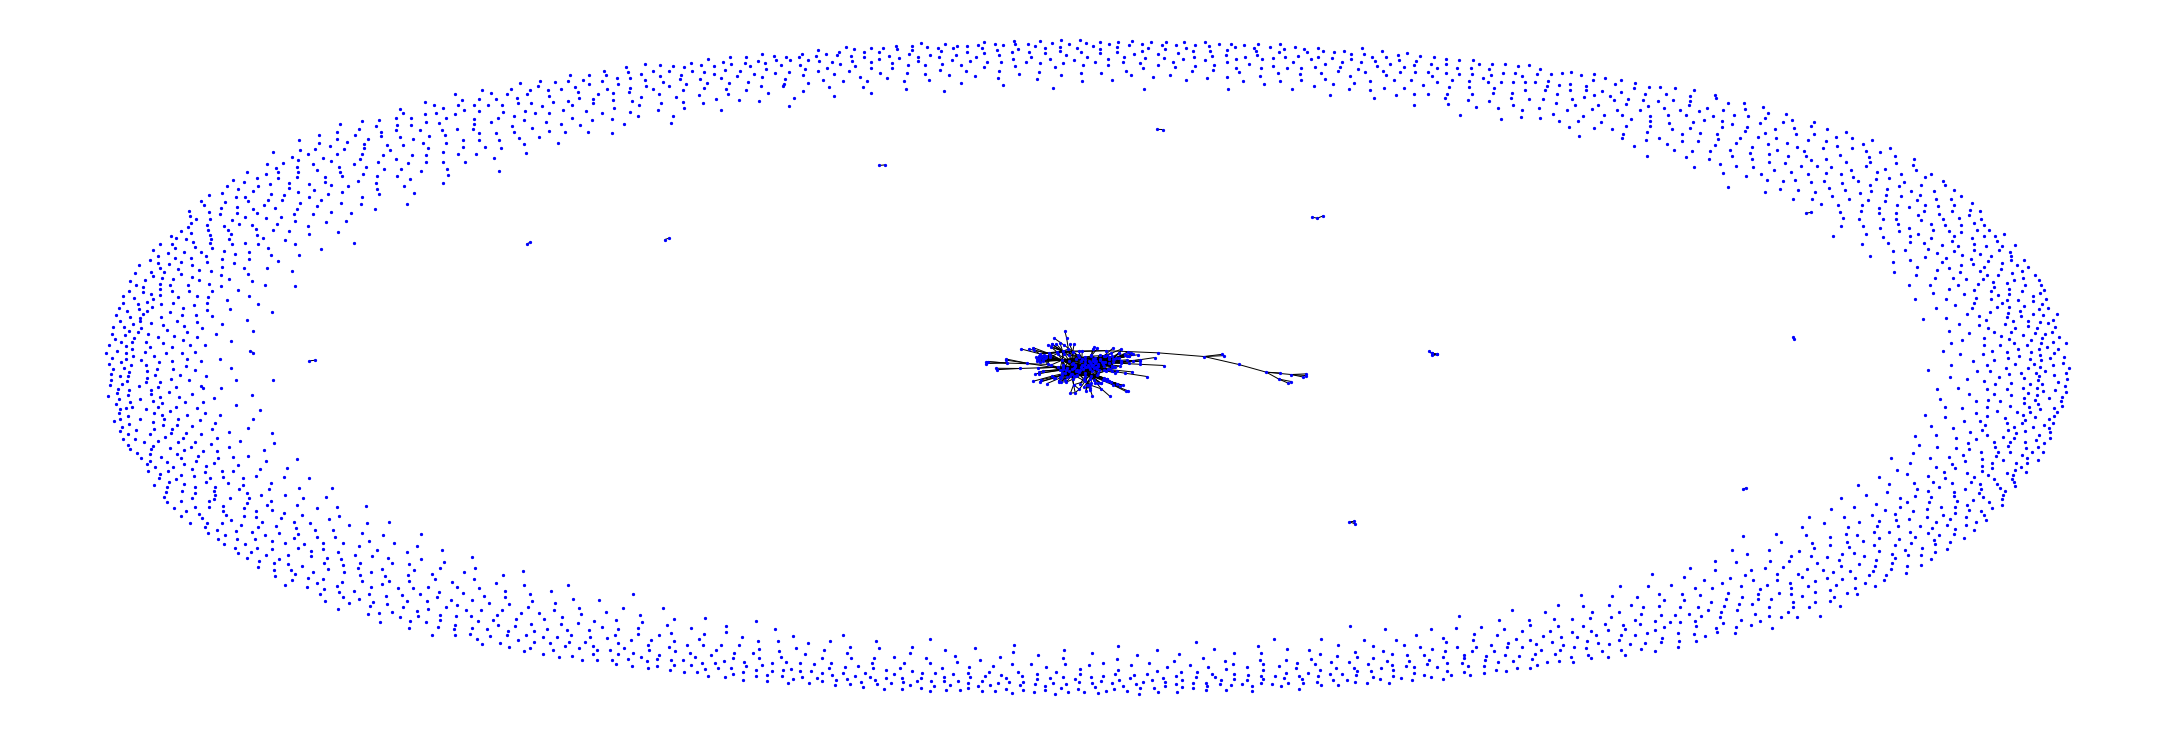

In [5]:
nodes_position = nx.spring_layout(friendshipGraph)
nx.draw(friendshipGraph, pos=nodes_position, node_color='b', node_size=5, with_labels=False)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

We can easily extract the connected component at the middle of the complete friendship graph by the following code.

In [17]:
conn_comp = nx.connected_components(friendshipGraph)
subnet_nodes = max(conn_comp, key=len)
subnet = friendshipGraph.subgraph(subnet_nodes)

print('Number of subnet nodes: ', subnet.number_of_nodes())
print('Number of subnet edges: ', subnet.number_of_edges())
print('Edges for user in average: ', round(subnet.number_of_edges()/subnet.number_of_nodes(), 3))

Number of subnet nodes:  267
Number of subnet edges:  588
Edges for user in average:  2.202


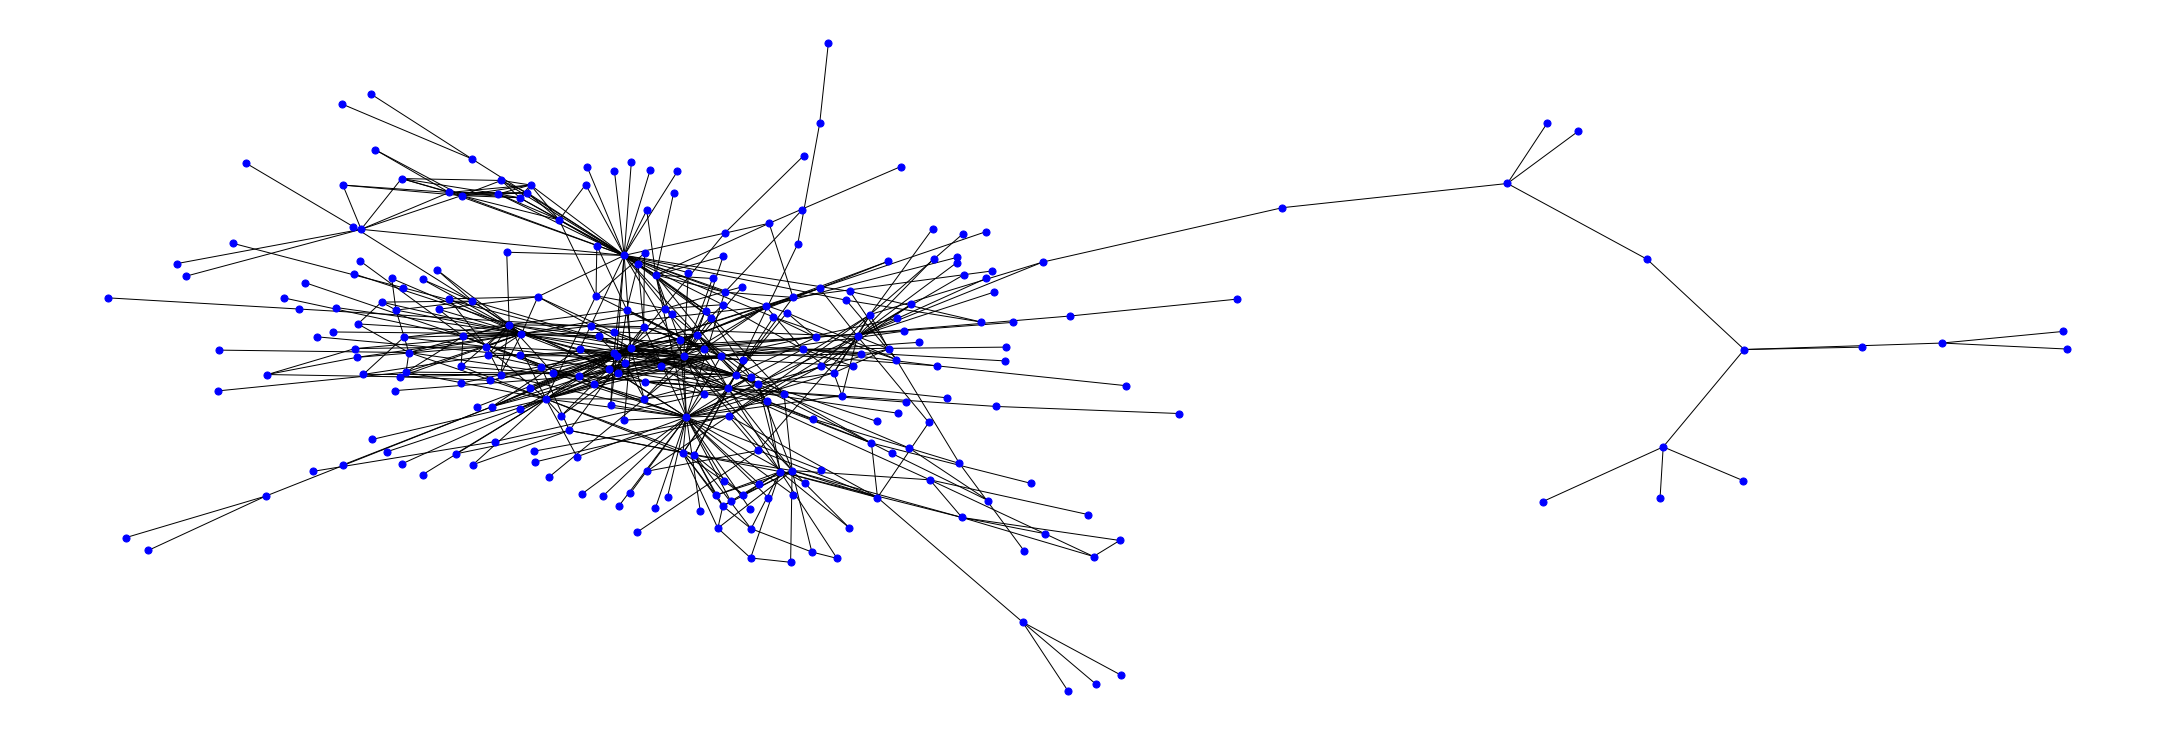

In [7]:
# Draw the most connected component
nodes_position = nx.spring_layout(subnet)
nx.draw(subnet, pos=nodes_position, node_color='b', node_size=50, with_labels=False)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

To analyze the subgraph we can compute some metrics, such as:
 - [betweenness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)
 - [closeness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html)
 - [degree centrality](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.centrality.degree_centrality.html)
 
These metrics are computed for each node of the graph. We just show the highest value, the tenth highest value and then the average and standard deviation. The metrics obtained on the subnet graph are grater than the same obtained on a random generated one.

In [14]:
import numpy as np 

bc = sorted(list((nx.betweenness_centrality(subnet)).values()), reverse = True)
print("Betweenness Centrality (First Node): ", round(bc[0], 3))
print("Betweenness Centrality (10th Node): ", round(bc[9], 3))
print('Betweenness centrality (mean, std): (', round(np.mean(bc), 3), ',', round(np.std(bc), 3), ')')

cc = sorted(list((nx.closeness_centrality(subnet)).values()), reverse = True)
print("\nCloseness Centrality (First Node): ", round(cc[0], 3))
print("Closeness Centrality (10th Node): ", round(cc[9], 3))
print('Closeness centrality (mean, std): (', round(np.mean(cc), 3), ',', round(np.std(cc), 3), ')')

dc = sorted(list((nx.degree_centrality(subnet)).values()), reverse = True)
print("\nDegree Centrality (First Node): ", round(dc[0], 3))
print("Degree Centrality (10th Node): ", round(dc[9], 3))
print('Degree centrality (mean, std): (', round(np.mean(dc), 3), ',', round(np.std(dc), 3), ')')

aspl = nx.average_shortest_path_length(subnet)
print("\nAverage shortest path length: ", aspl)

Betweenness Centrality (First Node):  0.287
Betweenness Centrality (10th Node):  0.09
Betweenness centrality (mean, std): ( 0.012 , 0.031 )

Closeness Centrality (First Node):  0.39
Closeness Centrality (10th Node):  0.337
Closeness centrality (mean, std): ( 0.256 , 0.05 )

Degree Centrality (First Node):  0.154
Degree Centrality (10th Node):  0.064
Degree centrality (mean, std): ( 0.017 , 0.022 )

Average shortest path length:  4.112866435752302


In [61]:
import random

G = nx.gnm_random_graph(subnet.number_of_nodes(), subnet.number_of_edges(), seed=7, directed=False)
conn_comp = sorted(list(nx.connected_components(G)), key=lambda x: len(x), reverse=True)

for k in range(0, len(list(conn_comp)) - 1):
    G.add_edge(random.choice(list(conn_comp[k])), random.choice(list(conn_comp[k+1])))

print('Number of random subnet nodes: ', G.number_of_nodes())
print('Number of random subnet edges: ', G.number_of_edges())

bc = sorted(list((nx.betweenness_centrality(G)).values()), reverse = True)
print("\nBetweenness Centrality (First Node): ", round(bc[0], 3))
print("Betweenness Centrality (10th Node): ", round(bc[9], 3))
print('Betweenness centrality (mean, std): (', round(np.mean(bc), 3), ',', round(np.std(bc), 3), ')')

cc = sorted(list((nx.closeness_centrality(G)).values()), reverse = True)
print("\nCloseness Centrality (First Node): ", round(cc[0], 3))
print("Closeness Centrality (10th Node): ", round(cc[9], 3))
print('Closeness centrality (mean, std): (', round(np.mean(cc), 3), ',', round(np.std(cc), 3), ')')

dc = sorted(list((nx.degree_centrality(G)).values()), reverse = True)
print("\nDegree Centrality (First Node): ", round(dc[0], 3))
print("Degree Centrality (10th Node): ", round(dc[9], 3))
print('Degree centrality (mean, std): (', round(np.mean(dc), 3), ',', round(np.std(dc), 3), ')')

aspl = nx.average_shortest_path_length(G)
print("\nAverage shortest path length: ", aspl)

Number of random subnet nodes:  267
Number of random subnet edges:  592

Betweenness Centrality (First Node):  0.053
Betweenness Centrality (10th Node):  0.032
Betweenness centrality (mean, std): ( 0.011 , 0.01 )

Closeness Centrality (First Node):  0.313
Closeness Centrality (10th Node):  0.296
Closeness centrality (mean, std): ( 0.256 , 0.027 )

Degree Centrality (First Node):  0.041
Degree Centrality (10th Node):  0.03
Degree centrality (mean, std): ( 0.017 , 0.008 )

Average shortest path length:  3.962490495902678


To know the largest group of users that are friends among them we have to extract the largest clique in the friendship graph.

In [29]:
# Cliques
cliques = sorted(list(nx.find_cliques(friendshipGraph)), key=lambda x: len(x), reverse=True)
cliques_nodes = cliques[0]
clique = friendshipGraph.subgraph(cliques_nodes)

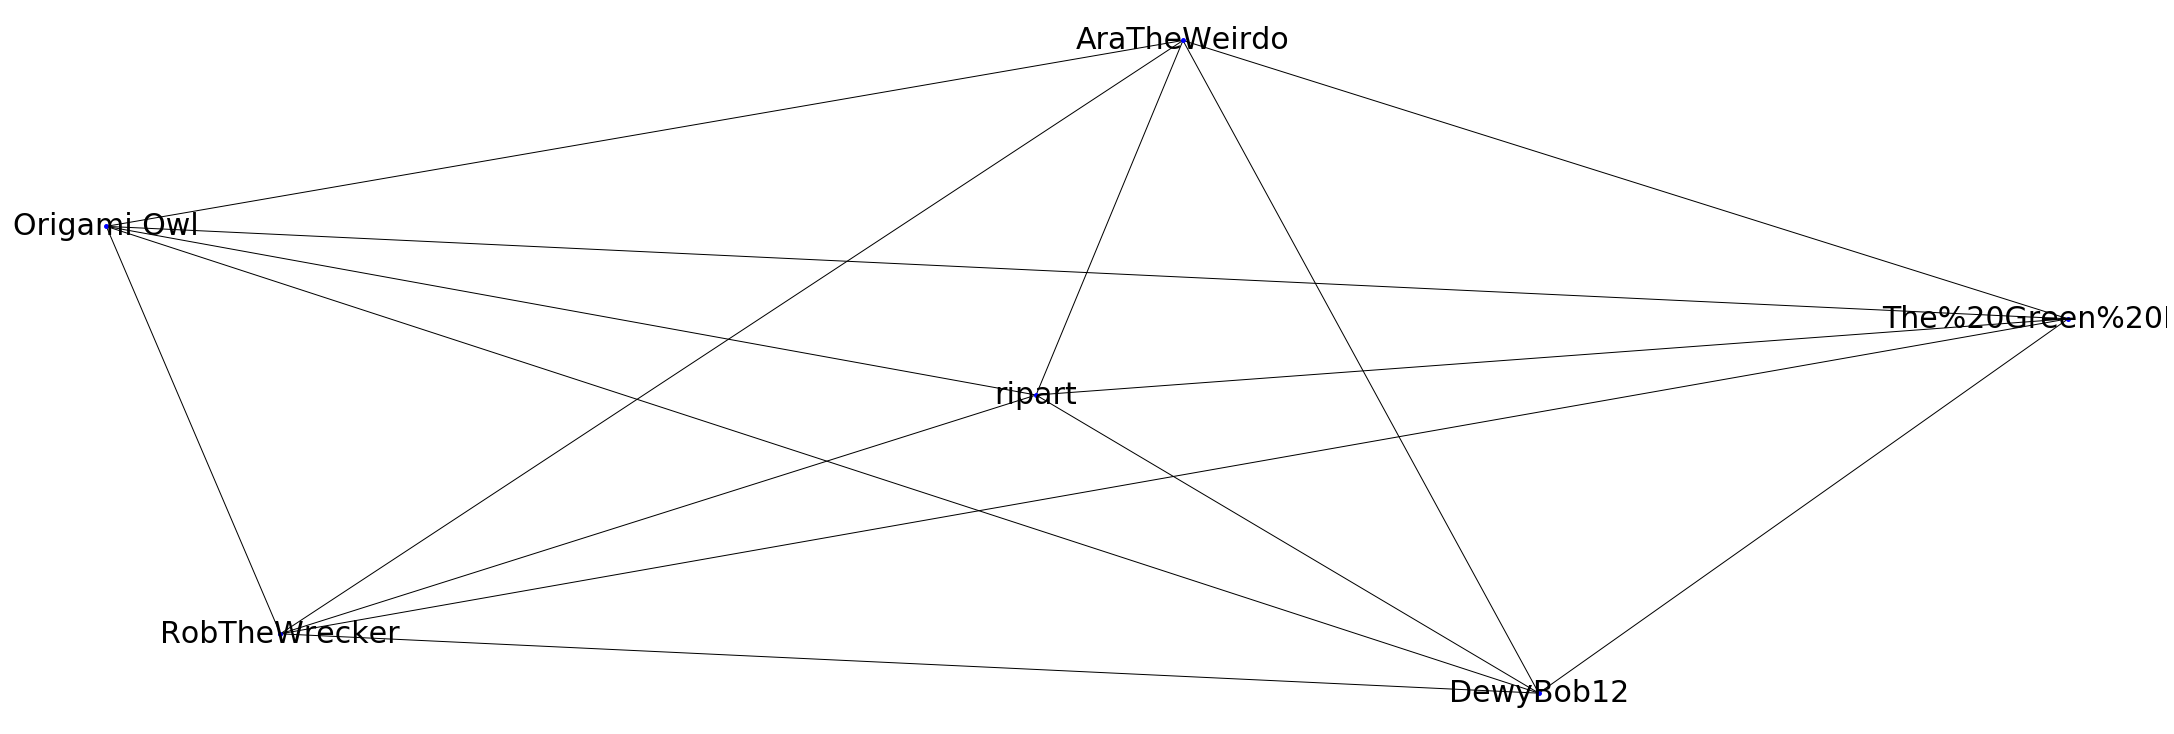

In [10]:
clique = friendshipGraph.subgraph(cliques_nodes)
pos = nx.spring_layout(clique)
nx.draw(clique, pos, node_color='b', node_size=15, with_labels=True, font_size=30)
plt.rcParams['figure.figsize'] = [25, 10]
plt.show()

We calculate the usual graph metrics for the clique.

In [30]:
bc = sorted(list((nx.betweenness_centrality(clique)).values()), reverse = True)
print("Betweenness Centrality (First Node): ", round(bc[0], 3))
print("Betweenness Centrality (Last Node): ", round(bc[len(bc)-1], 3))
print('Betweenness centrality (mean, std): (', round(np.mean(bc), 3), ',', round(np.std(bc), 3), ')')

cc = sorted(list((nx.closeness_centrality(clique)).values()), reverse = True)
print("\nCloseness Centrality (First Node): ", round(cc[0], 3))
print("Closeness Centrality (Last Node): ", round(cc[len(cc)-1], 3))
print('Closeness centrality (mean, std): (', round(np.mean(cc), 3), ',', round(np.std(cc), 3), ')')

dc = sorted(list((nx.degree_centrality(clique)).values()), reverse = True)
print("\nDegree Centrality (First Node): ", round(dc[0], 3))
print("Degree Centrality (Last Node): ", round(dc[len(dc)-1], 3))
print('Degree centrality (mean, std): (', round(np.mean(dc), 3), ',', round(np.std(dc), 3), ')')

Betweenness Centrality (First Node):  0.0
Betweenness Centrality (Last Node):  0.0
Betweenness centrality (mean, std): ( 0.0 , 0.0 )

Closeness Centrality (First Node):  1.0
Closeness Centrality (Last Node):  1.0
Closeness centrality (mean, std): ( 1.0 , 0.0 )

Degree Centrality (First Node):  1.0
Degree Centrality (Last Node):  1.0
Degree centrality (mean, std): ( 1.0 , 0.0 )


Obviously the average shortest path length of a clique is 1 since for each pair of nodes in a clique exists an edge.

In [16]:
# Average shortest path length
aspl = nx.average_shortest_path_length(clique)
print("Average shortest path length: ", aspl)

Average shortest path length:  1.0
